In [ ]:
#!apt install libgraphviz-dev
#!pip install pygraphviz
import pygraphviz as pgv
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
G = pgv.AGraph()

In [ ]:
node_list = [i for i in range(400)]

In [ ]:
G.add_nodes_from(node_list)

In [ ]:
#G.node_attr["shape"] = "circle"
#G.edge_attr["color"] = "red"

In [ ]:


#ajoute les noeuds
import random
p = 0.8
q = 0.01

    
def tirage(p,q):
    G = pgv.AGraph()
    G = nx.Graph()
    node_list = [i for i in range(1000)]
    G.add_nodes_from(node_list)
    dicoNeigh = {}
    for j in range(1000):
        for k in range(j+1,1000):
            if k-j<100:
                #tirage dans le même groupe
                tirage = random.random()
                if tirage <= p:
                    G.add_edge(j, k, color ="blue")
                    if j in dicoNeigh:
                        dicoNeigh[j].add(k)
                    else :
                        dicoNeigh[j] = {k}
                    if k in dicoNeigh :
                        dicoNeigh[k].add(j)
                    else : 
                        dicoNeigh[k] = {j}
            else : 
                #tirage pour groupes différents
                tirage = random.random()
                if tirage <= q:
                    G.add_edge(j, k, color ="red")
                    if j in dicoNeigh:
                        dicoNeigh[j].add(k)
                    else :
                        dicoNeigh[j] = {k}
                    if k in dicoNeigh :
                        dicoNeigh[k].add(j)
                    else : 
                        dicoNeigh[k] = {j}
    return dicoNeigh, G
   
dicoNeigh, G = tirage(p,q)


In [ ]:
#compute dicoNeigh for other graphs
import re
def getDicoNeigh(fileName):
    f = open(fileName, "r")
    dicoNeigh = {}
    for x in f:
        sep = re.split('\s+', x)
        if sep[0].isdigit():
            a = int(sep[0])
            b = int(sep[1])
            if a in dicoNeigh :
                dicoNeigh[a].add(b)
            else :
                dicoNeigh[a]={b}
            if b in dicoNeigh:
                dicoNeigh[b].add(a)
            else:
                dicoNeigh[b]={a}
    return dicoNeigh


In [ ]:
#Fisher Yates shuffle
def FisherYatesShuffle (listeToShuffle, nbNodes): 
    for i in range(nbNodes-1,0,-1): 
        j = random.randint(0,i) 
        listeToShuffle[j], listeToShuffle[i] = listeToShuffle[i], listeToShuffle[j] 
    return listeToShuffle

In [ ]:
#dicoNeigh = {1:{2,3,4}, 2:{1,3}, 3:{1,2}, 4:{1,5,6}, 5:{4,6}, 6:{4,5}}
from collections import defaultdict

def labelPropagation(dicoNeigh):
    nbNodes = max(dicoNeigh.keys())+1 #ajout artificiel drun zéro au cas où le noeud 0 est présent
    label = []
    #attribution d'un label unique pour chaque noeud si le noeud est relié au graphe
    for i in range(0, nbNodes):
        if i in dicoNeigh:
            label.append(i)
        else:
            #noeud non relié au graphe
            label.append(-1)
    continueIteration = True
    nbIter = 0
    while continueIteration:
        nbChange = 0
        listToShuffle = [i for i in range(nbNodes)]
        listShuffle = FisherYatesShuffle(listToShuffle, nbNodes)
        for node in listShuffle:
            if node in dicoNeigh:
                neighbours = dicoNeigh[node]
                dicoLabel = {}
                for neigh in neighbours:
                    if label[neigh] in dicoLabel:
                        dicoLabel[label[neigh]]+=1
                    else : 
                        dicoLabel[label[neigh]]=1
                dicoLabel_inverted = defaultdict(list)
                {dicoLabel_inverted[v].append(k) for k, v in dicoLabel.items()}
                dicoInverted = dict(dicoLabel_inverted)
                maxKey = max(dicoInverted.keys())
                #maxNumber = max(dicoLabel.values())
                #setLabelMax = set()
                #for key in dicoLabel.keys():
                #    if dicoLabel[key]==maxNumber:
                #        setLabelMax.add(key)
                #regarde si label déjà présent
                if label[node] not in dicoInverted[maxKey]:
                    #label[node] = setLabelMax.pop()
                    label[node] = random.choice(dicoInverted[maxKey])
                    nbChange +=1

        if nbChange == 0:
            continueIteration = False
        nbIter +=1
        
    return label  

dicoNeigh = getDicoNeigh('com-amazon.ungraph.txt')
import time
tps1 = time.clock()

label = labelPropagation(dicoNeigh)
tps2 = time.clock()
print(tps2 - tps1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


46.013378999999986


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [ ]:
fichier = open("testLabel.txt", "a")
for lab in label:
    fichier.write(str(lab)+'\n')
fichier.close()

In [ ]:
print(len(label))
print(len(list(set(label))))

548552
41557


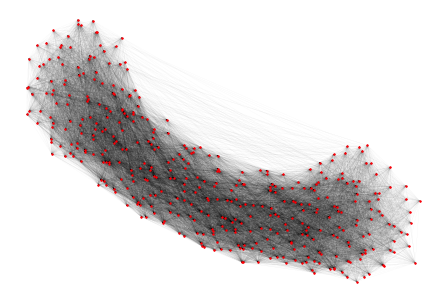

In [ ]:
pos = nx.spring_layout(G)
options = {
    "node_color": "blue",
    "node_size": 2,
    "linewidths": 0,
    "width": 0.01,
}
nx.draw(G, pos, **options)
nx.draw_networkx_nodes(G, pos,  node_size=2, node_color="r")
plt.show()

ValueError: ignored

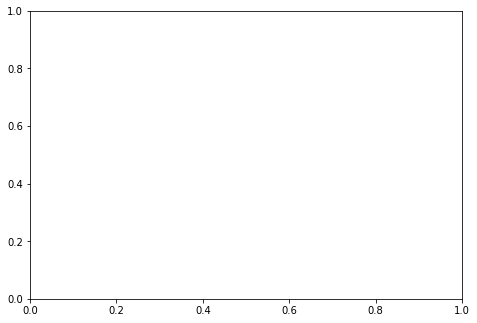

In [ ]:
import networkx as nx

def colorNode(number):
    if number < 100:
        return 'yellow'
    elif number < 200:
        return 'orange'
    elif number < 300:
        return 'green'
    else : 
        return 'magenta'

options = {
    #"node_color": "black",
    "node_size": 20,
    "linewidths": 0,
    "width": 0.08,
}
edges = G.edges()
colorNodes = [colorNode(i) for i in range(400)]
colors = [G[u][v]['color'] for u,v in edges]
nx.draw(G, edges = edges,node_color = colorNodes, edge_color = colors, **options)

ValueError: ignored

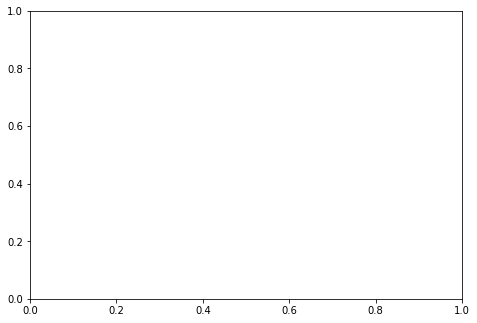

In [ ]:
nx.draw_circular(G, edges = edges,node_color = colorNodes, edge_color = colors, **options)

ValueError: ignored

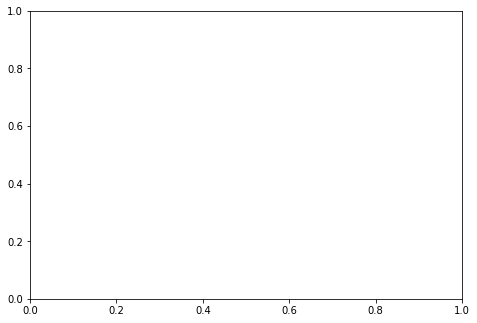

In [ ]:
import networkx as nx

def colorNode(number):
    if number < 100:
        return 'yellow'
    elif number < 200:
        return 'orange'
    elif number < 300:
        return 'green'
    else : 
        return 'magenta'

options = {
    #"node_color": "black",
    "node_size": 20,
    "linewidths": 0,
    "width": 0.08,
}
edges = G.edges()
colorNodes = [label[i] for i in range(400)]
colors = [G[u][v]['color'] for u,v in edges]
nx.draw(G, edges = edges,node_color = colorNodes, edge_color = colors, **options)

ValueError: ignored

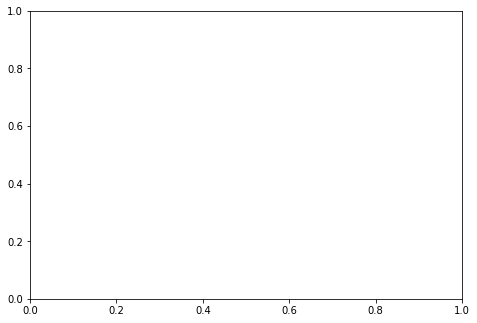

In [ ]:
nx.draw_circular(G, edges = edges,node_color = colorNodes, edge_color = colors, **options)

# Louvain methods

In [ ]:
#from zipfile import ZipFile
#with ZipFile('bin.zip', 'r') as zf:
   #zf.extractall('/content/')
#with ZipFile('docs.zip', 'r') as zf:
 #  zf.extractall('/content/')
#with ZipFile('community.zip', 'r') as zf:
   #zf.extractall('/content/')
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx 

In [ ]:
pip install python-louvain

In [ ]:
p = 0.8
q = 0.01

    
def graphe(p,q,n):
    G = pgv.AGraph()
    G = nx.Graph()
    node_list = [i for i in range(n)]
    G.add_nodes_from(node_list)
    dicoNeigh = {}
    for j in range(n):
        for k in range(j+1,n):
            if k-j<100:
                #tirage dans le même groupe
                tirage = random.random()
                if tirage <= p:
                    G.add_edge(j, k, color ="blue")
                    if j in dicoNeigh:
                        dicoNeigh[j].add(k)
                    else :
                        dicoNeigh[j] = {k}
                    if k in dicoNeigh :
                        dicoNeigh[k].add(j)
                    else : 
                        dicoNeigh[k] = {j}
            else : 
                #tirage pour groupes différents
                tirage = random.random()
                if tirage <= q:
                    G.add_edge(j, k, color ="red")
                    if j in dicoNeigh:
                        dicoNeigh[j].add(k)
                    else :
                        dicoNeigh[j] = {k}
                    if k in dicoNeigh :
                        dicoNeigh[k].add(j)
                    else : 
                        dicoNeigh[k] = {j}
    return dicoNeigh, G
   


In [ ]:
import time

n=4000
dicoNeigh, Q = graphe(p,q,n)
tps1 = time.clock()
label = labelPropagation(dicoNeigh)
tps2 = time.clock()
print(tps2 - tps1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


7.30150500000002


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


52.207041000000004


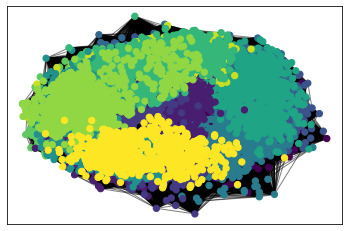

In [ ]:

import time
tps3 = time.clock()
# compute the best partition
partition = community_louvain.best_partition(Q)
tps4 = time.clock()
print(tps4 - tps3)
# draw the graph
pos = nx.spring_layout(Q)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(Q, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(Q, pos, alpha=0.5)
plt.show()


LFR_benchmark_graph




Requirement already up-to-date: networkx in /usr/local/lib/python3.7/dist-packages (2.5)


In [ ]:
!pip install --upgrade networkx
from networkx.algorithms.community import LFR_benchmark_graph
n =250
tau1 = 3
tau2 = 1.5
mu = 0.1
G=LFR_benchmark_graph(n,tau1,tau2,mu,average_degree=5,min_community=20,seed=10)
nx.write_graphml(G,'graph.graphml')

Requirement already up-to-date: networkx in /usr/local/lib/python3.7/dist-packages (2.5)


ImportError: ignored